In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## Scipy linprog example:

```python
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='highs', callback=None, options=None, x0=None, integrality=None)
```

minimize: c @ x \
such that: \
A_ub @ x <= b_ub \
A_eq @ x == b_eq \
lb <= x <= ub

Consider the following example: \
$$ \text{min}_{x_0, x_1} -x_0 + 4x_1$$
such that: \
$$
\begin{align}
-3x_0 +x_1 & \leq 6 \\ 
-x_0 -2X_1 & \geq -4 \\
x_1 & \geq -3
\end{align}
$$

linprog excepts the greater then in line two to be a less then, we can achieve this by multiplying both sides by $-1$.

$$
\begin{align}
-3x_0 + x_1 & \leq 6 \\ 
x_0 + 2X_1 & \leq 4 \\
x_1 & \geq -3
\end{align}
$$

Input for linprog then looks like this:

In [2]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)

Minimization condition c has $-1$ for $x_0$ and $4$ for $x_1$.
Matrix A has the form of the factors before our minimization parameters:
$$
\begin{align}
A = \begin{pmatrix}
-3 & 1 \\
1 & 2 
\end{pmatrix}.
\end{align}
$$
Target vector b is $(6,4)$ the limits of our inequalities.
The bounds are only limited by the condition of $x_1$ be larger then -3, all other bounds are infinite, so explicitly called as None!

In [3]:
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], integrality=[1])
res.x

array([10., -3.])

Optimisation result shows that one optimal set of values is: \
$x_0 = 10$ and $x_1 = -3$. 


In [4]:
res.fun

-22.0

The optimal function value for our condition:
$$ \text{min}_{x_0, x_1} -x_0 + 4x_1,$$
is $-10 + 4 \cdot -3 = -22$.


In [5]:
res.message

'Optimization terminated successfully. (HiGHS Status 7: Optimal)'

In [6]:
res.ineqlin

 marginals: array([0., 0.])
  residual: array([39.,  0.])

For example, because the marginal associated with the second inequality constraint is -1, we expect the optimal value of the objective function to decrease by eps if we add a small amount eps to the right hand side of the second inequality constraint:

In [7]:
eps = 0.05
b[1] += eps
linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds]).fun

-22.05

Also, because the residual on the first inequality constraint is 39, we can decrease the right hand side of the first constraint by 39 without affecting the optimal solution. Such that:

$$
\begin{align}
-3x_0 + x_1 & \leq 6 - 39 = -33 \\ 
x_0 + 2X_1 & \leq 4 \\
x_1 & \geq -3
\end{align}
$$

In [8]:
b = [6, 4]  # reset to original values
b[0] -= 39
linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds]).fun

-22.0

# Basic Linear Programming (LP) 1D example:

Maximize $z = 3x$ subject to the constraint:
$$0 ≤ x ≤ 3.$$



The feasible region is the line segment from x = 0 to x = 3. The objective function z = 3x increases as x increases, so the optimal solution will be at the upper endpoint of the line segment, which is x = 3. \
The initial feasible solution is x = 0, which is one endpoint of the line segment. The entering variable is x, since it has a positive coefficient in the objective function. The leaving variable is x = 0, since it is the only basic variable, and it must be increased to maintain feasibility while increasing x. Therefore, we pivot by replacing x = 0 with the entering variable x, which gives:
$$
x ≤ 3
$$
The new solution is x = 3, which is the optimal solution. Since there is only one variable, there are no further iterations of the algorithm needed.

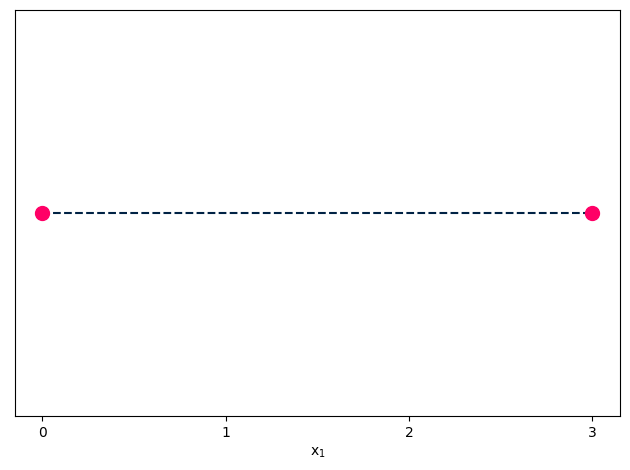

In [9]:
arte_green_transparent = '#bde5e5ff'
arte_red = '#ff0066'
arte_primary = '#002244'

plt.plot([0,3],[0,0], color=arte_primary, linestyle='--')
plt.plot(0,0, '.', color=arte_red, ms=20)
plt.plot(3,0, '.', color=arte_red, ms=20)
# t.plot(2, 0, 'rx')
fig1 = plt.gca()
fig1.axes.get_yaxis().set_visible(False)
plt.xticks(np.arange(0, 4, 1.0))
plt.xlabel('x$_1$')
plt.tight_layout()
# plt.savefig('1D_example.png', dpi=300)

# LP Problem 2D:

Maximize z = 2x1 + 3x2 subject to the constraints:
$$
\begin{align}
x1 + x2 & ≤ 4 \\
2x1 + x2 & ≤ 5 \\
x1, x2 & ≥ 0
\end{align}
$$

Rephrase as minimization problem for linprog: \
Minimize z = -2x1 + -3x2 subject to the constraints:
$$
\begin{align}
x1 + x2 & ≤ 4 \\
2x1 + x2 & ≤ 5 \\
x1, x2 & ≥ 0
\end{align}
$$

In [10]:
c = [-2, -3]
A = [[1, 1], [2, 1]]
b = [4, 5]
x0_bounds = (0, None)
x1_bounds = (0, None)

In [11]:
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
res.x

array([0., 4.])

In [12]:
res.fun

-12.0

In [13]:
res.message

'Optimization terminated successfully. (HiGHS Status 7: Optimal)'

In [14]:
res.ineqlin

 marginals: array([-3., -0.])
  residual: array([0., 1.])

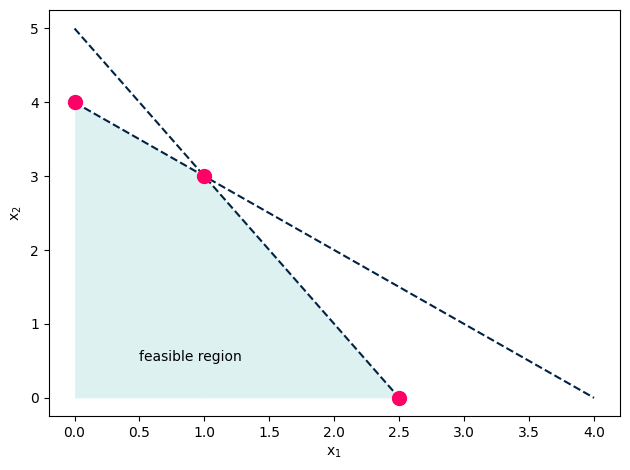

In [15]:
arte_green_transparent = '#bde5e5ff'
arte_red = '#ff0066'
arte_primary = '#002244'

plt.plot([0, 4],[4, 0], color=arte_primary, linestyle='--')
plt.plot([0, 2.5],[5, 0], color=arte_primary, linestyle='--')

plt.fill_between([0,1], [4,3], [0,0], color=arte_green_transparent, alpha=0.5, linewidth=0)
plt.fill_between([1,2.5], [3,0], [0,0], color=arte_green_transparent, alpha=0.5, linewidth=0)
plt.annotate('feasible region', (1,1), (0.5, 0.5))

plt.plot(0, 4, '.', color=arte_red, ms=20)
plt.plot(1, 3, '.', color=arte_red, ms=20)
plt.plot(2.5, 0, '.', color=arte_red, ms=20)

plt.xlabel('x$_1$')
plt.ylabel('x$_2$')
plt.tight_layout()
# plt.savefig('2D_region.png', dpi=300)

## google Slides Example:
Production of Mahagoni Chairs / Tables, \
450 man hours available, \
400 mahagoni Boards, \
Want 4 chairs min for each table! \
Chair: 5 Boards, 10 hours, 45€ profit \
Table: 10 Boards, 15 hours, 80€ profit \
$x1$ = chairs, $x2$ = tables: \
$$\text{max}_{x_1, x_2}\ 45\cdot x_1 + 80\cdot x_2$$ \
Constraints:  \
$$
\begin{align}
3\cdot x_1 + 10\cdot x_2 &<= 200 \\
10\cdot x_1+15\cdot x_2 &<= 450 \\
-4\cdot x_1 + x_2 &<= 0
\end{align}
$$

In [33]:
res = linprog([-45, -80], A_ub= [[3,10], [10,15], [-1,4]], b_ub=[200, 450, 0], integrality=[1,1])
res

           con: array([], dtype=float64)
 crossover_nit: -1
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -2125.0
       ineqlin:  marginals: array([0., 0., 0.])
  residual: array([21.,  0.,  1.])
         lower:  marginals: array([0., 0.])
  residual: array([33.,  8.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: -1
         slack: array([21.,  0.,  1.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([33.,  8.])

$x1$ = chairs, $x2$ = tables: \
$$\text{max}_{x_1, x_2}\ 45\cdot x_1 + 80\cdot x_2$$ \
Constraints:  \
$$
\begin{align}
3\cdot x_1 + 10\cdot x_2 &<= 200 \\
10\cdot x_1+15\cdot x_2 &<= 450 \\
\end{align}
$$

In [32]:
res = linprog([-45, -80], A_ub= [[3,10], [10,15]], b_ub=[200, 450], integrality=[1,1])
res

           con: array([], dtype=float64)
 crossover_nit: -1
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -2150.0
       ineqlin:  marginals: array([0., 0.])
  residual: array([10.,  0.])
         lower:  marginals: array([0., 0.])
  residual: array([30., 10.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: -1
         slack: array([10.,  0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([30., 10.])

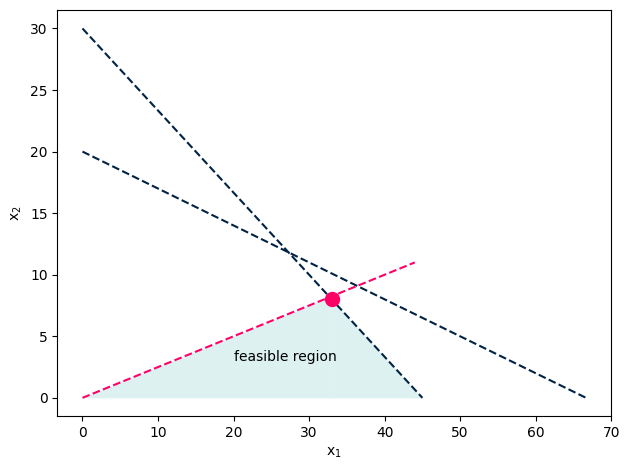

In [42]:
plt.plot([0, 200/3],[20, 0], color=arte_primary, linestyle='--')
plt.plot([0, 45],[30, 0], color=arte_primary, linestyle='--')
plt.plot([0, 44],[0, 11], color=arte_red, linestyle='--')

plt.fill_between([0, 32.727], [0, 8.182], color=arte_green_transparent, alpha=0.5, linewidth=0)
# plt.fill_between([400/13, 37.5], [100/13, 5], color=arte_green_transparent, alpha=0.5, linewidth=0)
plt.fill_between([32.727, 45], [8.182, 0], color=arte_green_transparent, alpha=0.5, linewidth=0)
plt.annotate('feasible region', (20,3), (20, 3))

plt.plot(33, 8, '.', color=arte_red, ms=20)
#plt.plot(400/13, 100/13, '.', color=arte_red, ms=20)
# plt.plot(31, 7, '.', color=arte_red, ms=20)


plt.xlabel('x$_1$')
plt.ylabel('x$_2$')
plt.tight_layout()
# plt.savefig('2D_region_example.png', dpi=300)